In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,f1_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [187]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/kidney_disease.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [188]:
df.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [189]:
df.sample(10)

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
273,273,47.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,95.0,35.0,0.9,140.0,4.1,NaN,NaN,NaN,NaN,no,no,no,good,no,no,notckd
173,173,17.0,70.0,1.015,1.0,0.0,abnormal,normal,notpresent,notpresent,22.0,1.5,7.3,145.0,2.8,13.1,41,11200,NaN,no,no,no,good,no,no,ckd
101,101,71.0,90.0,1.015,2.0,0.0,NaN,abnormal,present,present,88.0,80.0,4.4,139.0,5.7,11.3,33,10700,3.9,no,no,no,good,no,no,ckd
303,303,55.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,107.0,26.0,1.1,NaN,NaN,17.0,50,6700,6.1,no,no,no,good,no,no,notckd
143,143,41.0,80.0,1.015,1.0,4.0,abnormal,normal,notpresent,notpresent,210.0,165.0,18.0,135.0,4.7,NaN,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
331,331,59.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,130.0,39.0,0.7,147.0,4.7,13.5,46,6700,4.5,no,no,no,good,no,no,notckd
104,104,55.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,143.0,88.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,no,poor,yes,no,ckd
311,311,56.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,132.0,18.0,1.1,147.0,4.7,13.7,45,7500,5.6,no,no,no,good,no,no,notckd
156,156,66.0,90.0,1.015,2.0,0.0,NaN,normal,notpresent,present,153.0,76.0,3.3,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,poor,no,no,ckd
102,102,17.0,60.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,92.0,32.0,2.1,141.0,4.2,13.9,52,7000,NaN,no,no,no,good,no,no,ckd


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [191]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood_pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific_gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood_glucose_random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood_urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum_creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [192]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [193]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [194]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [195]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [196]:
num_cols

['id',
 'age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [197]:
for col in cat_cols:
    print(f'{col} {df[col].unique()}')

red_blood_cells [nan 'normal' 'abnormal']
pus_cell ['normal' 'abnormal' nan]
pus_cell_clumps ['notpresent' 'present' nan]
bacteria ['notpresent' 'present' nan]
hypertension ['yes' 'no' nan]
diabetes_mellitus ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease ['no' 'yes' '\tno' nan]
appetite ['good' 'poor' nan]
peda_edema ['no' 'yes' nan]
aanemia ['no' 'yes' nan]
class ['ckd' 'ckd\t' 'notckd']


In [198]:
df['diabetes_mellitus'].replace({'\tno':'no', '\tyes':'yes', ' yes':'yes'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].str.replace('\tno', 'no')
df['class'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'}, inplace=True)

In [199]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [200]:
cols = ['diabetes_mellitus','coronary_artery_disease','class']

for col in cols:
    print(f'{col} {df[col].unique()}')

diabetes_mellitus ['yes' 'no' nan]
coronary_artery_disease ['no' 'yes' nan]
class [0 1]


In [201]:
value_counts = df['class'].value_counts()
categories = value_counts.index
counts = value_counts.values

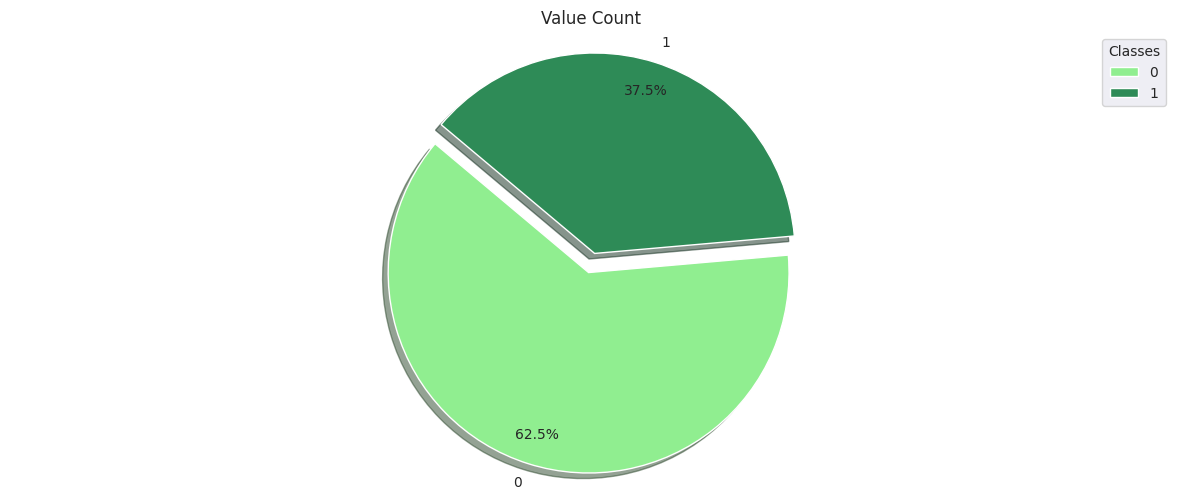

In [202]:
colors = ['lightgreen', 'seagreen', 'forestgreen']
explode = [0.05] * len(counts)

plt.pie(counts, explode=explode, shadow=True, labels=categories, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=colors)
plt.axis('equal')
plt.title('Value Count')
plt.legend(categories, title='Classes', loc='best')
plt.show()


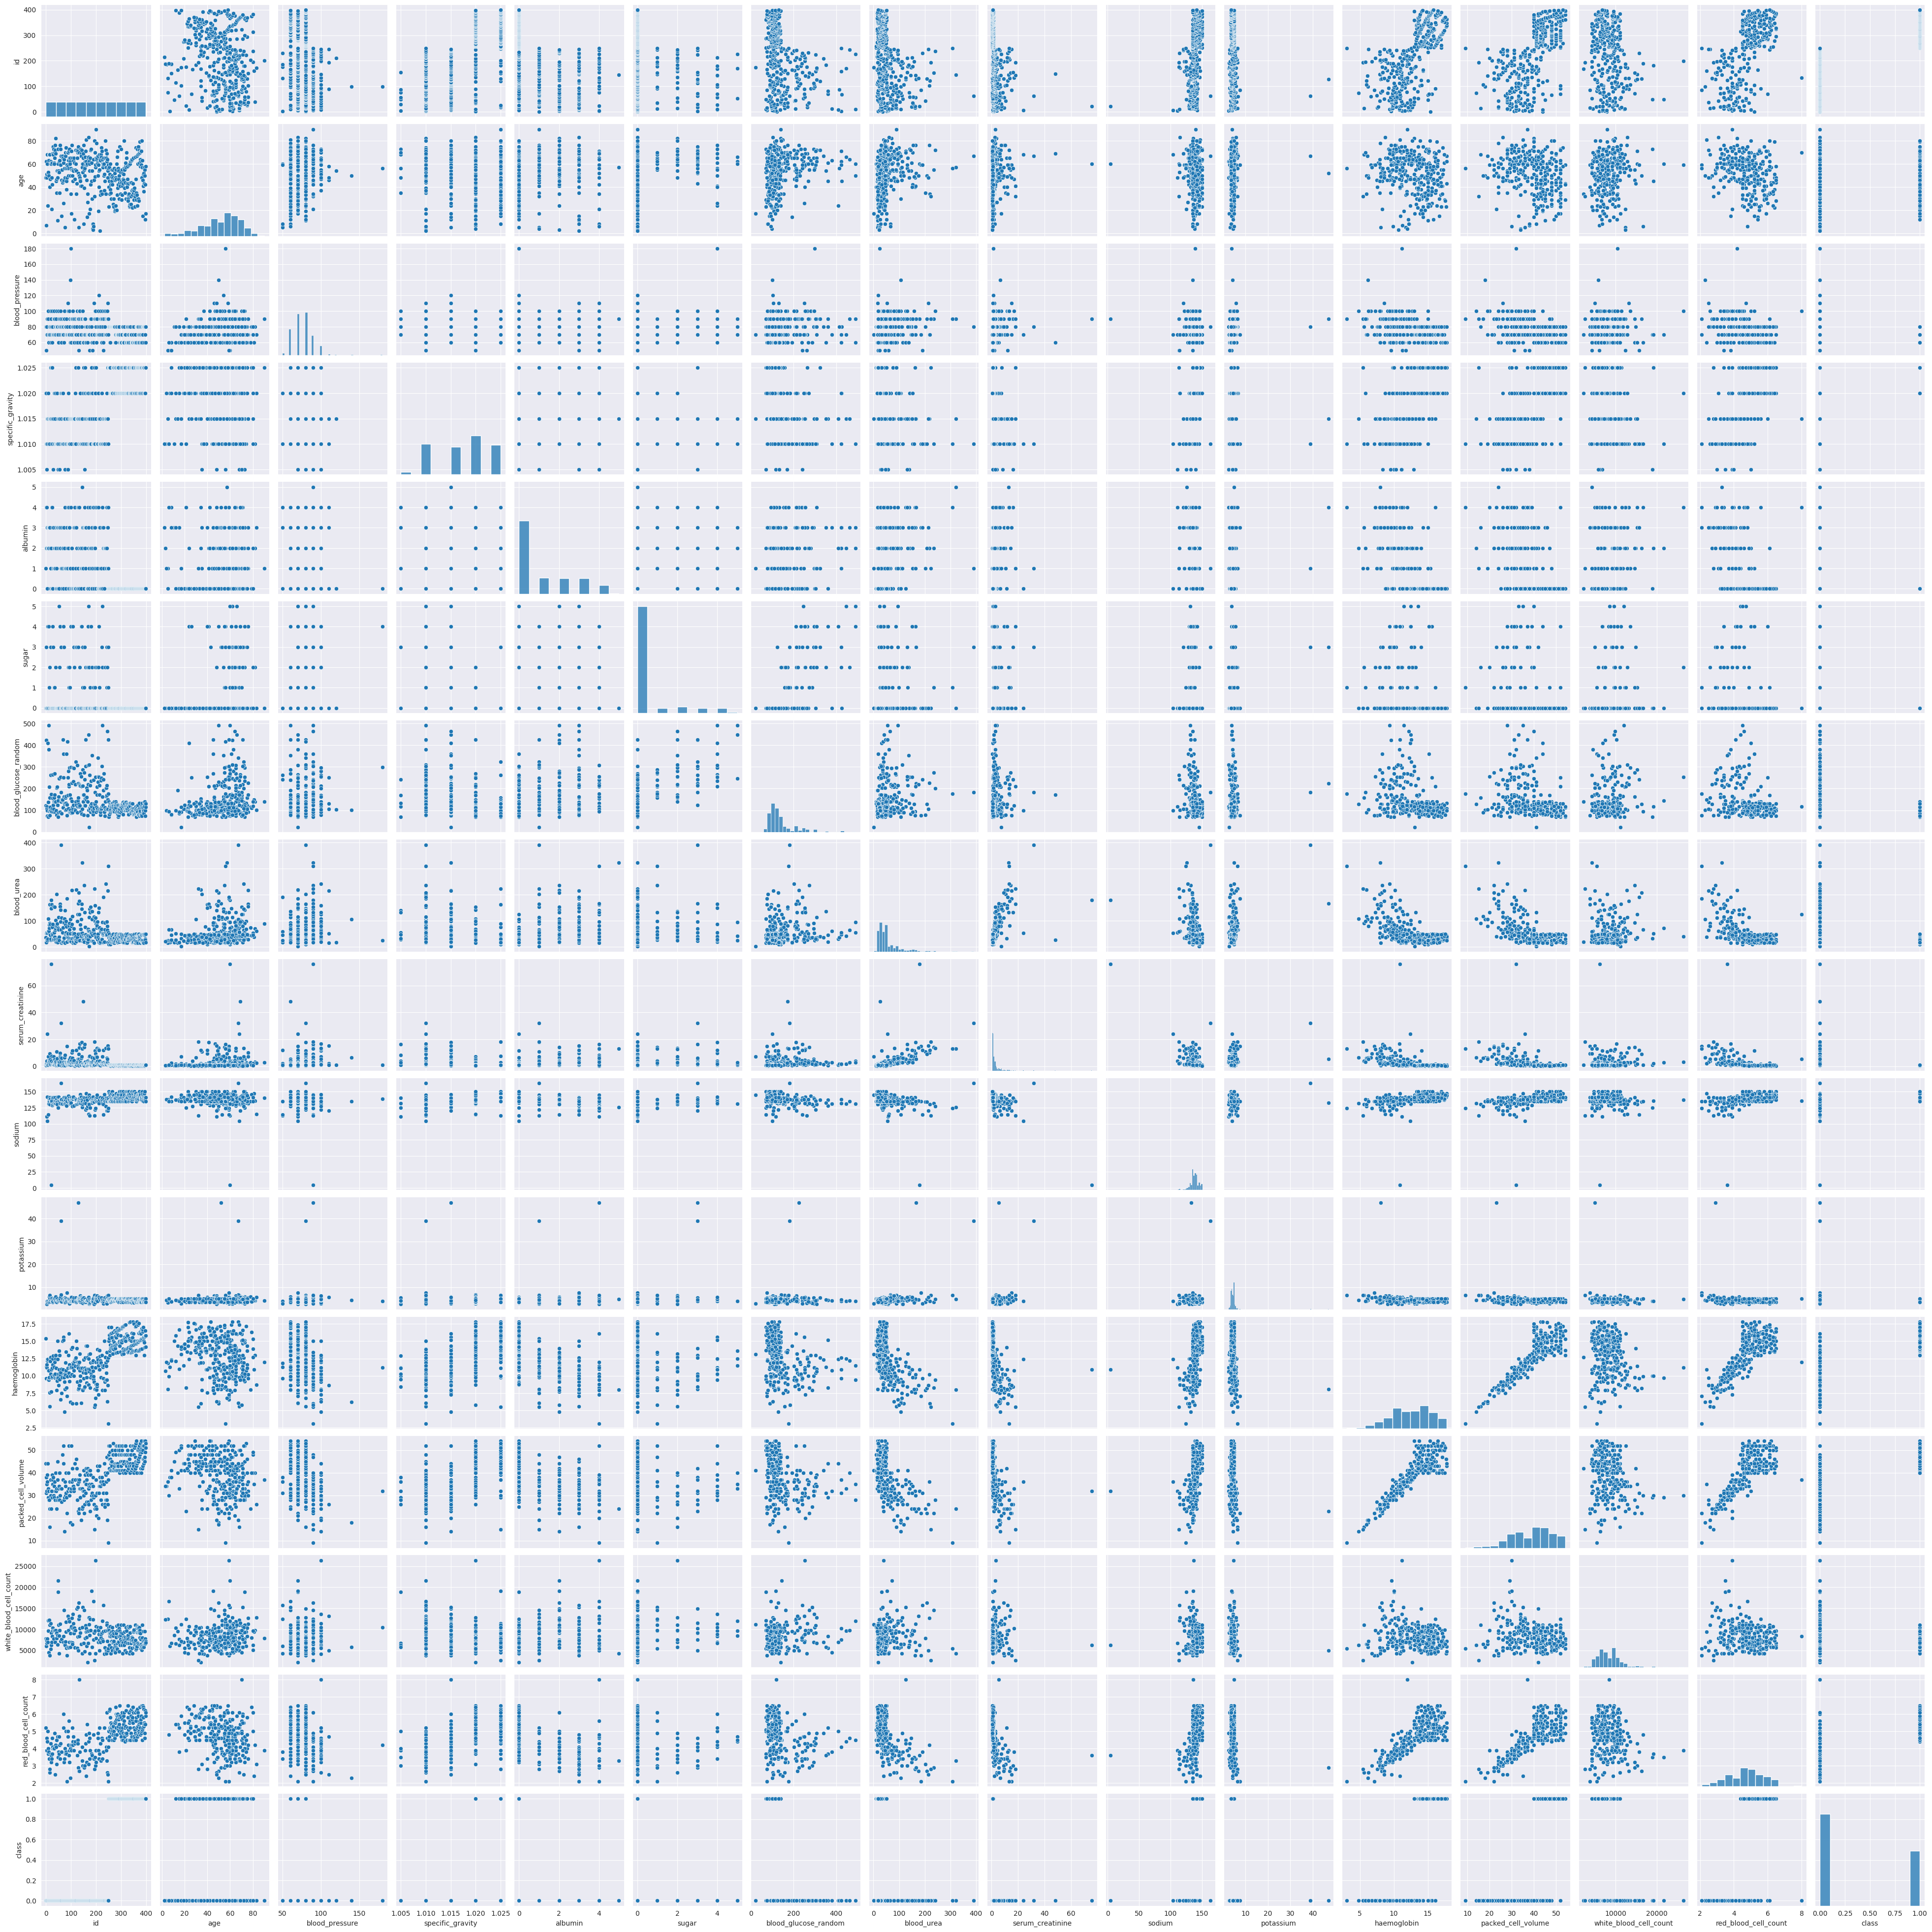

In [203]:
sns.pairplot(df);

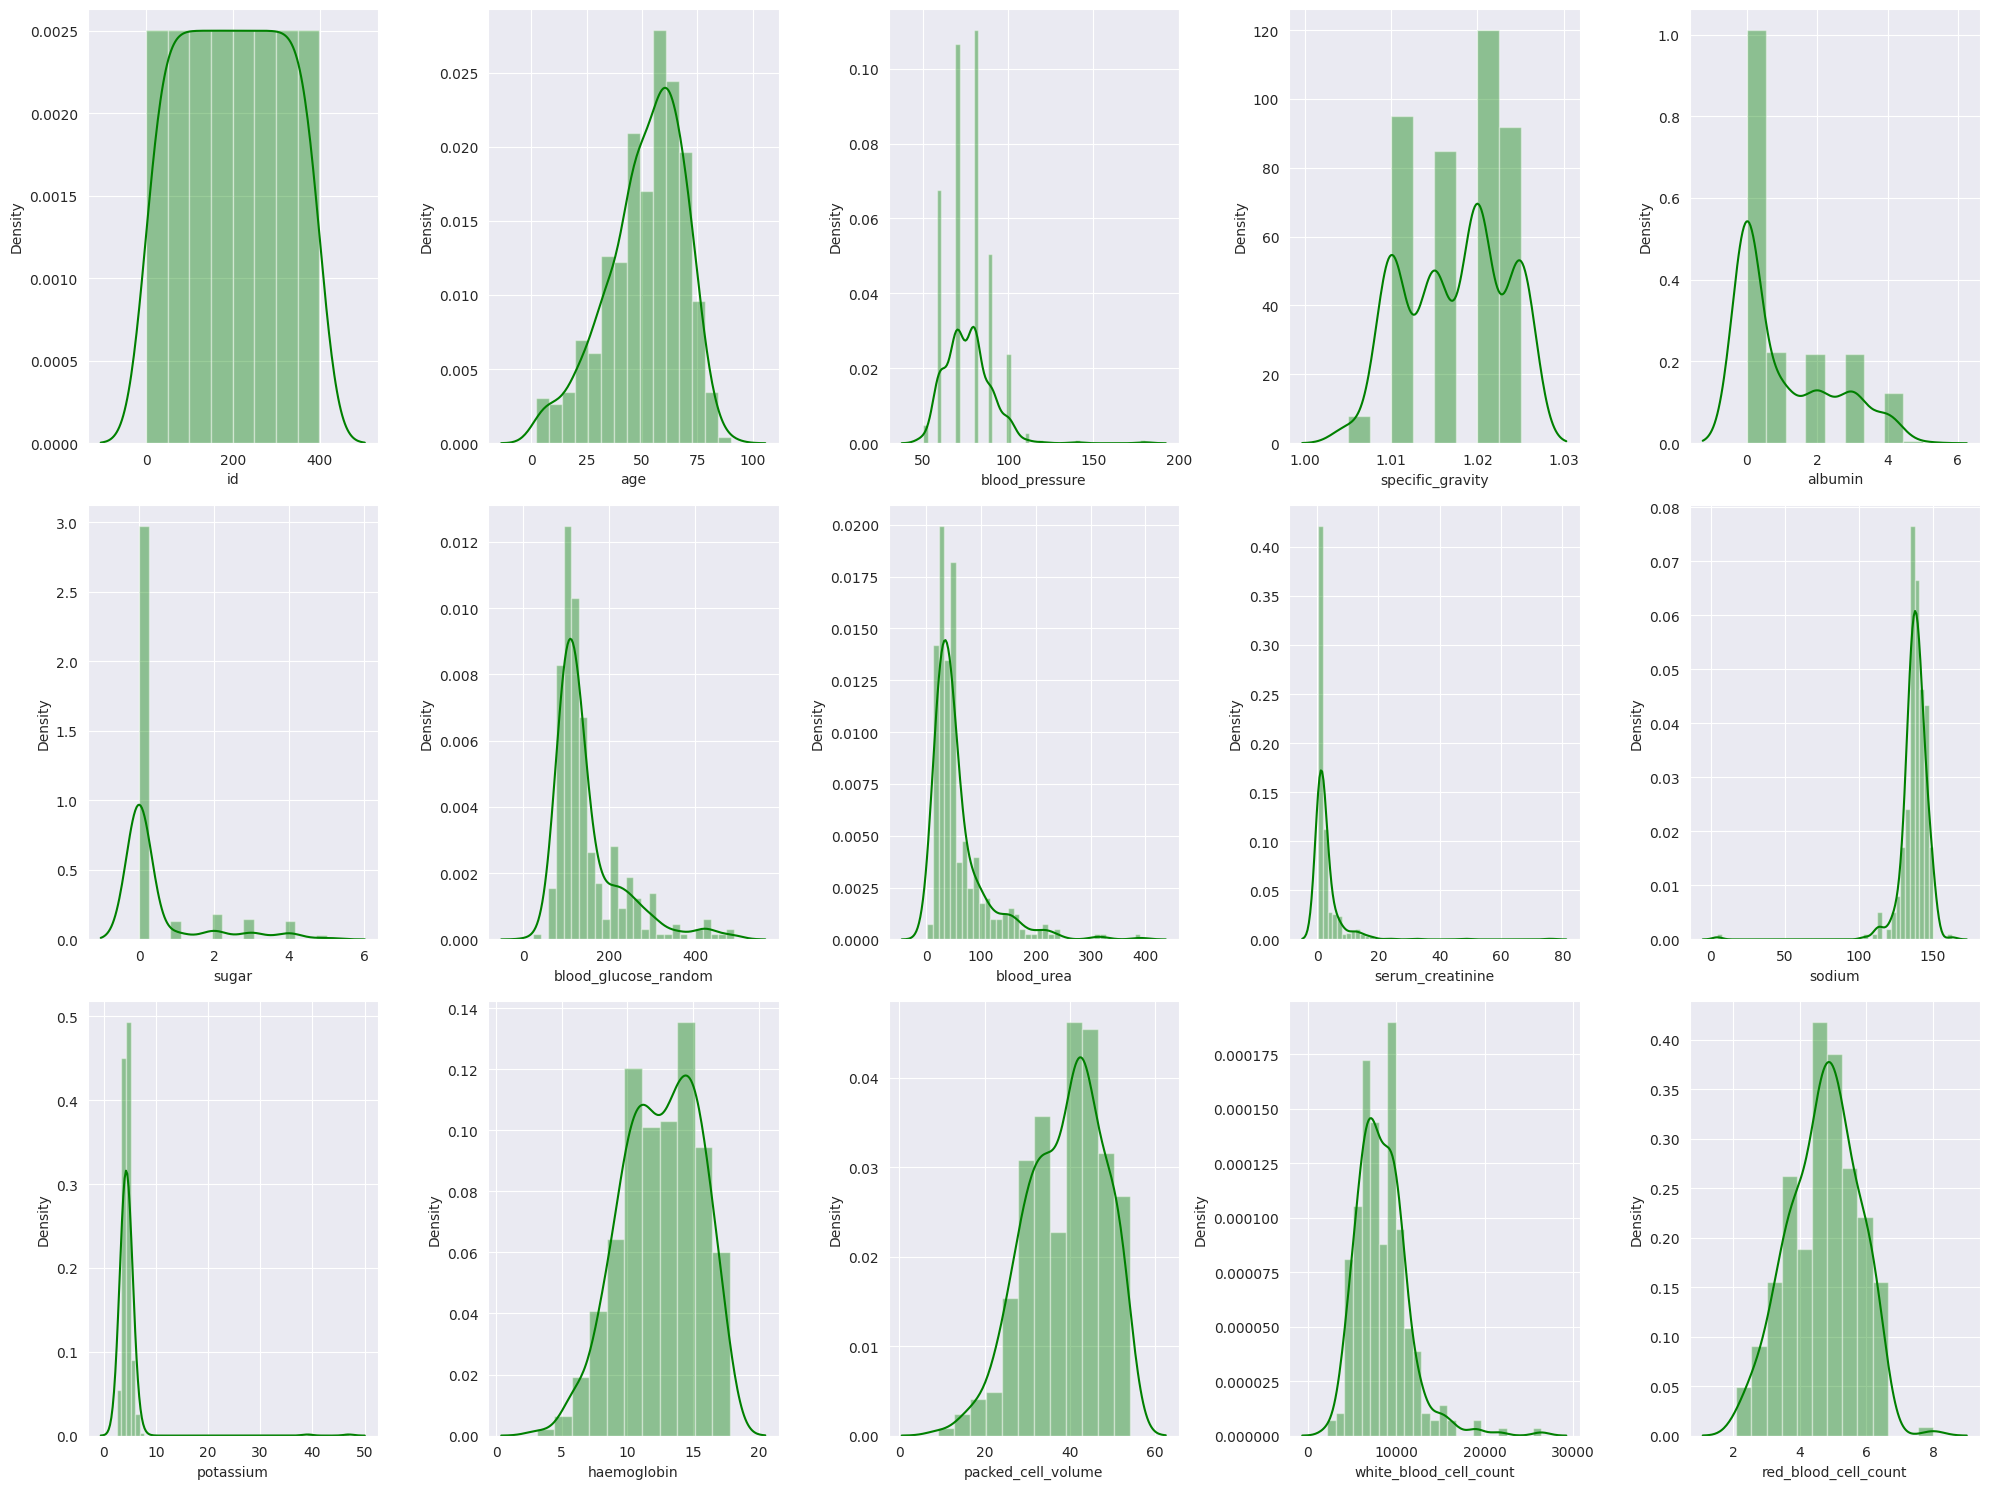

In [204]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 5, i)
    sns.distplot(df[column], color='green')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [205]:
for column in cat_cols:
    print(f"--- {column} ---")
    total_count = len(df[column])
    unique_values = df[column].value_counts()
    for value, count in unique_values.items():
        percentage = (count / total_count) * 100
        print(f"{value}: {percentage:.1f}%")
    print()

--- red_blood_cells ---
normal: 50.2%
abnormal: 11.8%

--- pus_cell ---
normal: 64.8%
abnormal: 19.0%

--- pus_cell_clumps ---
notpresent: 88.5%
present: 10.5%

--- bacteria ---
notpresent: 93.5%
present: 5.5%

--- hypertension ---
no: 62.7%
yes: 36.8%

--- diabetes_mellitus ---
no: 65.2%
yes: 34.2%

--- coronary_artery_disease ---
no: 91.0%
yes: 8.5%

--- appetite ---
good: 79.2%
poor: 20.5%

--- peda_edema ---
no: 80.8%
yes: 19.0%

--- aanemia ---
no: 84.8%
yes: 15.0%

--- class ---
0: 62.5%
1: 37.5%



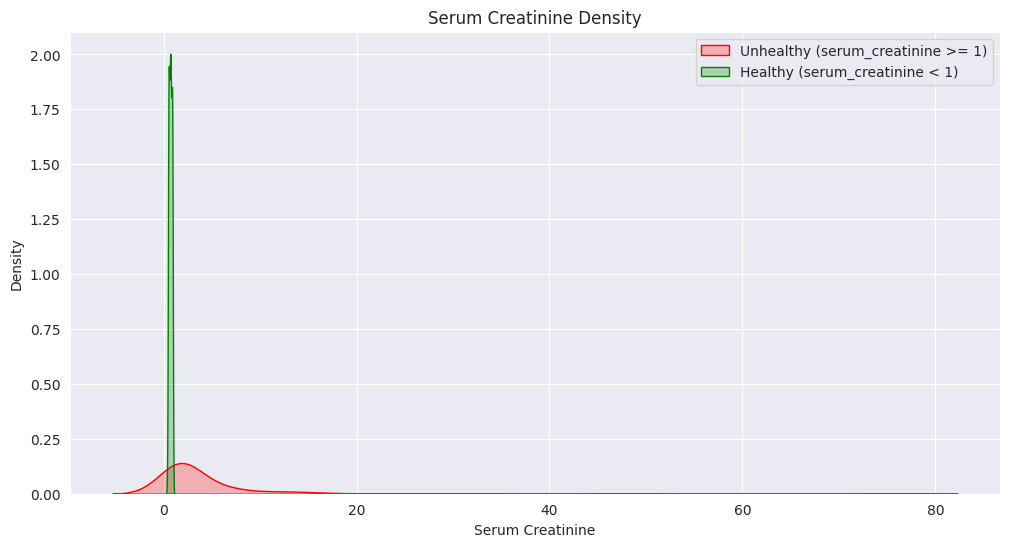

In [206]:
unhealthy = df[df['serum_creatinine'] >= 1]['serum_creatinine']
healthy = df[df['serum_creatinine'] < 1]['serum_creatinine']

plt.figure(figsize = (12,6))
sns.kdeplot(data=unhealthy, color='red', shade=True, label='Unhealthy (serum_creatinine >= 1)')
sns.kdeplot(data=healthy, color='green', shade=True, label='Healthy (serum_creatinine < 1)')

plt.title('Serum Creatinine Density')
plt.xlabel('Serum Creatinine')
plt.ylabel('Density')
plt.legend()
plt.show()

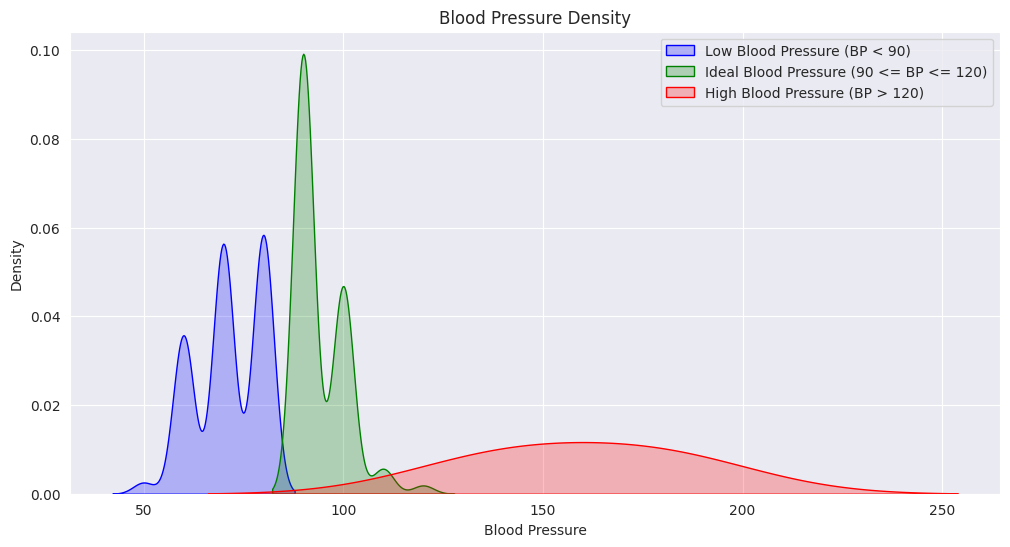

In [207]:
low_bp = df[df['blood_pressure'] < 90]['blood_pressure']
ideal_bp = df[(df['blood_pressure'] >= 90) & (df['blood_pressure'] <= 120)]['blood_pressure']
high_bp = df[df['blood_pressure'] > 120]['blood_pressure']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=low_bp, color='blue', shade=True, label='Low Blood Pressure (BP < 90)')
sns.kdeplot(data=ideal_bp, color='green', shade=True, label='Ideal Blood Pressure (90 <= BP <= 120)')
sns.kdeplot(data=high_bp, color='red', shade=True, label='High Blood Pressure (BP > 120)')

plt.title('Blood Pressure Density')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.legend()
plt.show()

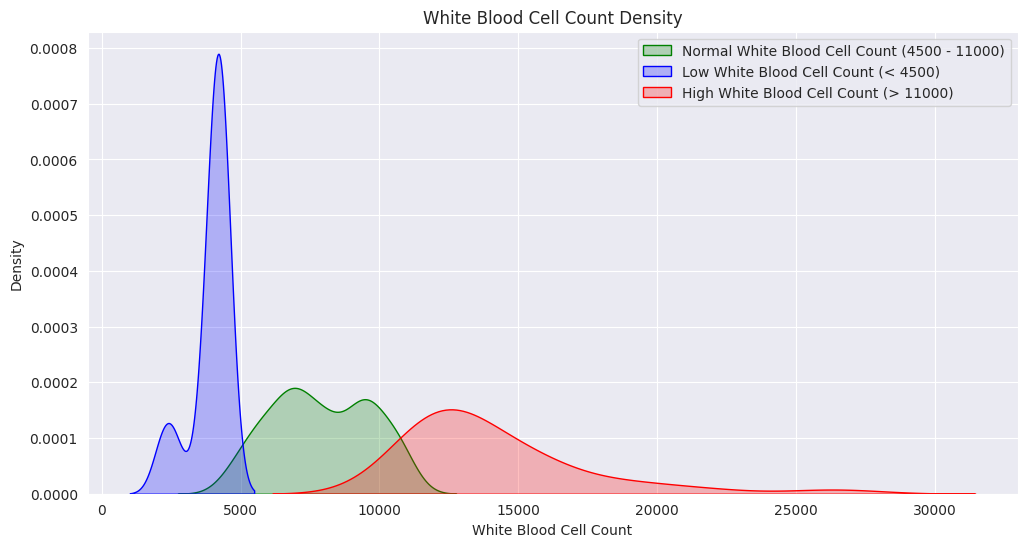

In [208]:
normal_wbc = df[(df['white_blood_cell_count'] >= 4500) & (df['white_blood_cell_count'] <= 11000)]['white_blood_cell_count']
low_wbc = df[df['white_blood_cell_count'] < 4500]['white_blood_cell_count']
high_wbc = df[df['white_blood_cell_count'] > 11000]['white_blood_cell_count']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=normal_wbc, color='green', shade=True, label='Normal White Blood Cell Count (4500 - 11000)')
sns.kdeplot(data=low_wbc, color='blue', shade=True, label='Low White Blood Cell Count (< 4500)')
sns.kdeplot(data=high_wbc, color='red', shade=True, label='High White Blood Cell Count (> 11000)')

plt.title('White Blood Cell Count Density')
plt.xlabel('White Blood Cell Count')
plt.ylabel('Density')
plt.legend()
plt.show()

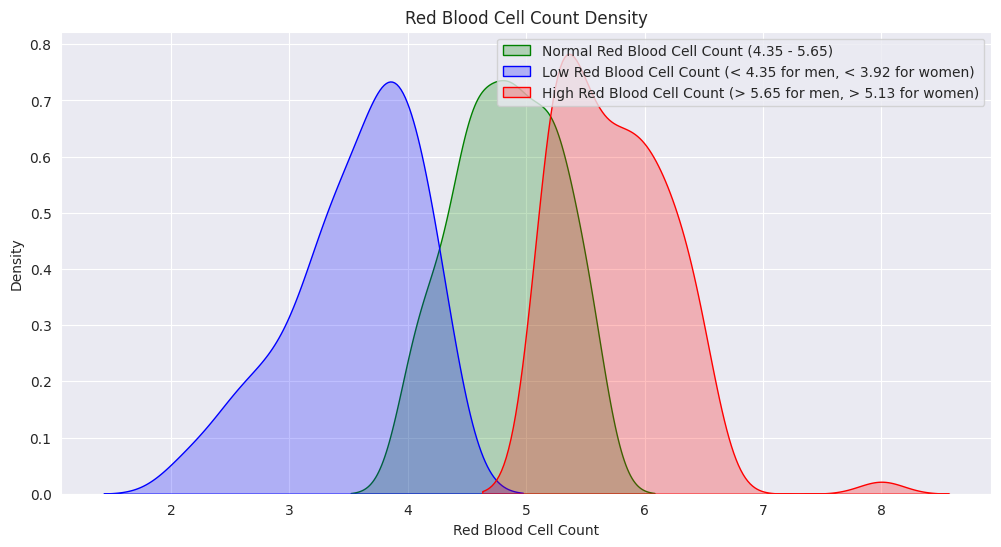

In [209]:
normal_rbc = df[((df['red_blood_cell_count'] >= 4.35) & (df['red_blood_cell_count'] <= 5.65)) | ((df['red_blood_cell_count'] >= 3.92) & (df['red_blood_cell_count'] <= 5.13))]['red_blood_cell_count']
low_rbc = df[(df['red_blood_cell_count'] < 4.35) | (df['red_blood_cell_count'] < 3.92)]['red_blood_cell_count']
high_rbc = df[(df['red_blood_cell_count'] > 5.65) | (df['red_blood_cell_count'] > 5.13)]['red_blood_cell_count']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=normal_rbc, color='green', shade=True, label='Normal Red Blood Cell Count (4.35 - 5.65)')
sns.kdeplot(data=low_rbc, color='blue', shade=True, label='Low Red Blood Cell Count (< 4.35 for men, < 3.92 for women)')
sns.kdeplot(data=high_rbc, color='red', shade=True, label='High Red Blood Cell Count (> 5.65 for men, > 5.13 for women)')

plt.title('Red Blood Cell Count Density')
plt.xlabel('Red Blood Cell Count')
plt.ylabel('Density')
plt.legend()
plt.show()

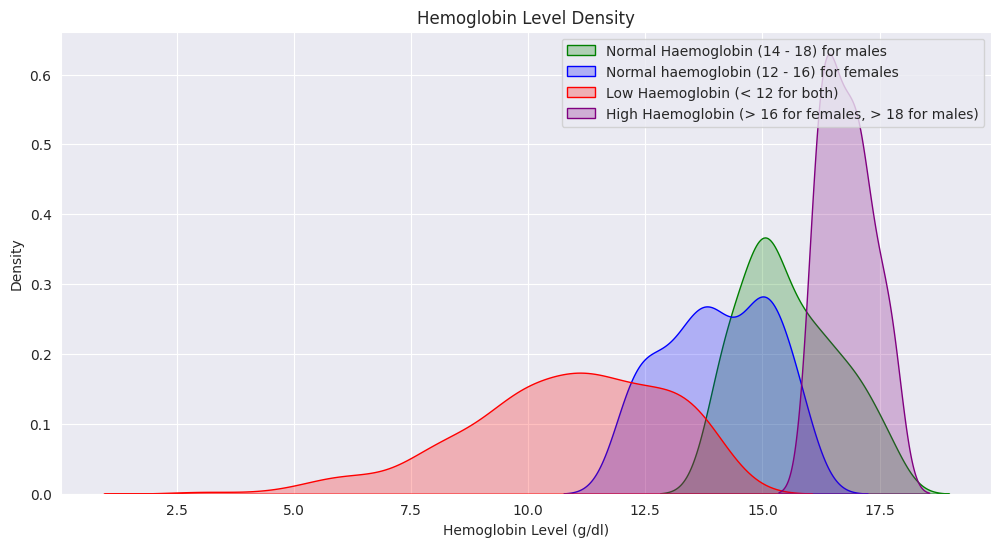

In [210]:
normal_hb_male = df[(df['haemoglobin'] >= 14) & (df['haemoglobin'] <= 18)]['haemoglobin']
normal_hb_female = df[(df['haemoglobin'] >= 12) & (df['haemoglobin'] <= 16)]['haemoglobin']
low_hb = df[(df['haemoglobin'] < 12) | (df['haemoglobin'] < 14)]['haemoglobin']
high_hb = df[(df['haemoglobin'] > 16) | (df['haemoglobin'] > 18)]['haemoglobin']

# KDE grafiğini çizme
plt.figure(figsize=(12, 6))
sns.kdeplot(data=normal_hb_male, color='green', shade=True, label='Normal Haemoglobin (14 - 18) for males')
sns.kdeplot(data=normal_hb_female, color='blue', shade=True, label='Normal haemoglobin (12 - 16) for females')
sns.kdeplot(data=low_hb, color='red', shade=True, label='Low Haemoglobin (< 12 for both)')
sns.kdeplot(data=high_hb, color='purple', shade=True, label='High Haemoglobin (> 16 for females, > 18 for males)')

plt.title('Hemoglobin Level Density')
plt.xlabel('Hemoglobin Level (g/dl)')
plt.ylabel('Density')
plt.legend()
plt.show()

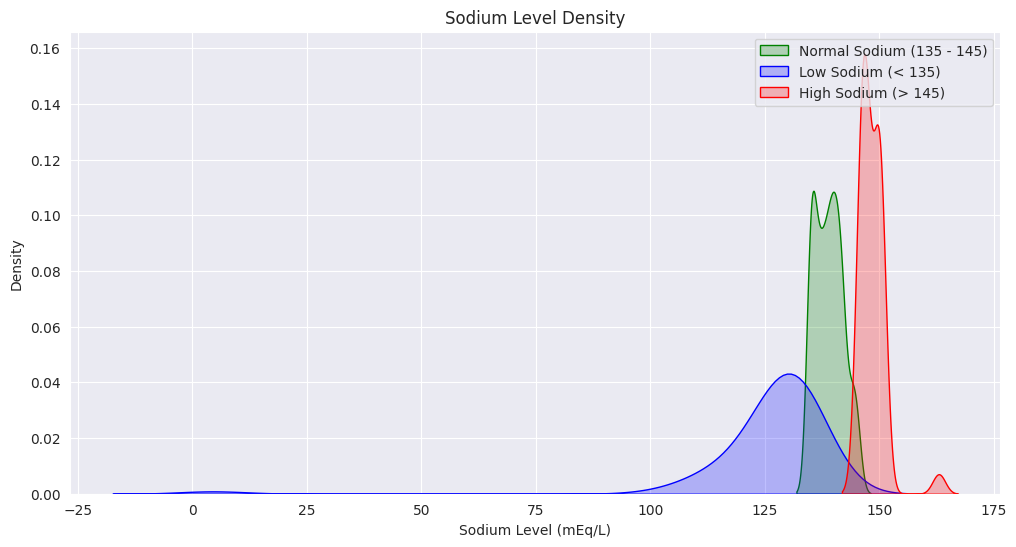

In [211]:
normal_sodium = df[(df['sodium'] >= 135) & (df['sodium'] <= 145)]['sodium']
low_sodium = df[df['sodium'] < 135]['sodium']
high_sodium = df[df['sodium'] > 145]['sodium']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=normal_sodium, color='green', shade=True, label='Normal Sodium (135 - 145)')
sns.kdeplot(data=low_sodium, color='blue', shade=True, label='Low Sodium (< 135)')
sns.kdeplot(data=high_sodium, color='red', shade=True, label='High Sodium (> 145)')

plt.title('Sodium Level Density')
plt.xlabel('Sodium Level (mEq/L)')
plt.ylabel('Density')
plt.legend()
plt.show()

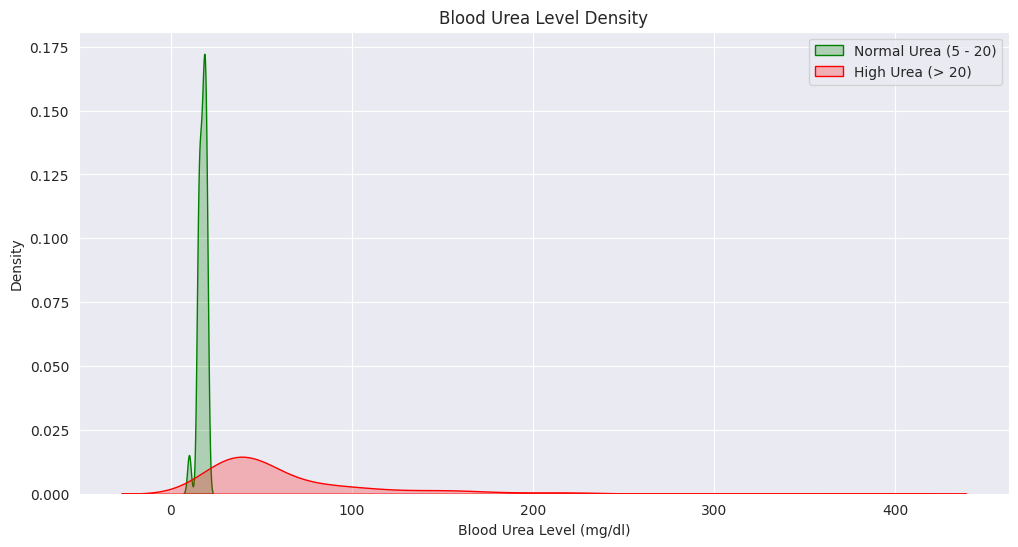

In [212]:
normal_urea = df[(df['blood_urea'] >= 5) & (df['blood_urea'] <= 20)]['blood_urea']
low_urea = df[df['blood_urea'] < 5]['blood_urea']
high_urea = df[df['blood_urea'] > 20]['blood_urea']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=normal_urea, color='green', shade=True, label='Normal Urea (5 - 20)')
sns.kdeplot(data=low_urea, color='blue', shade=True, label='Low Urea (< 5)')
sns.kdeplot(data=high_urea, color='red', shade=True, label='High Urea (> 20)')

plt.title('Blood Urea Level Density')
plt.xlabel('Blood Urea Level (mg/dl)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [213]:
df[num_cols].isnull().sum()

id                          0
age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [214]:
median_values = df[num_cols].median()
df[num_cols] = df[num_cols].fillna(median_values)

In [215]:
df[num_cols].isnull().sum()

id                        0
age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [216]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [217]:
mode_values = df.mode().iloc[0]  # Tüm DataFrame'in mod değerlerini hesapla
df[cat_cols] = df[cat_cols].fillna(mode_values)

In [218]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [219]:
LabelEncoder = LabelEncoder()

for col in cat_cols:
    df[col] = LabelEncoder.fit_transform(df[col])

In [220]:
df.head()


,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [221]:
y = df['class']
x = df.drop(['class'], axis=1)
print(x.shape)
print(y.shape)

(400, 25)
(400,)


In [222]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=42)

In [223]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

[[117   0]
 [  0  63]]
1.0 %


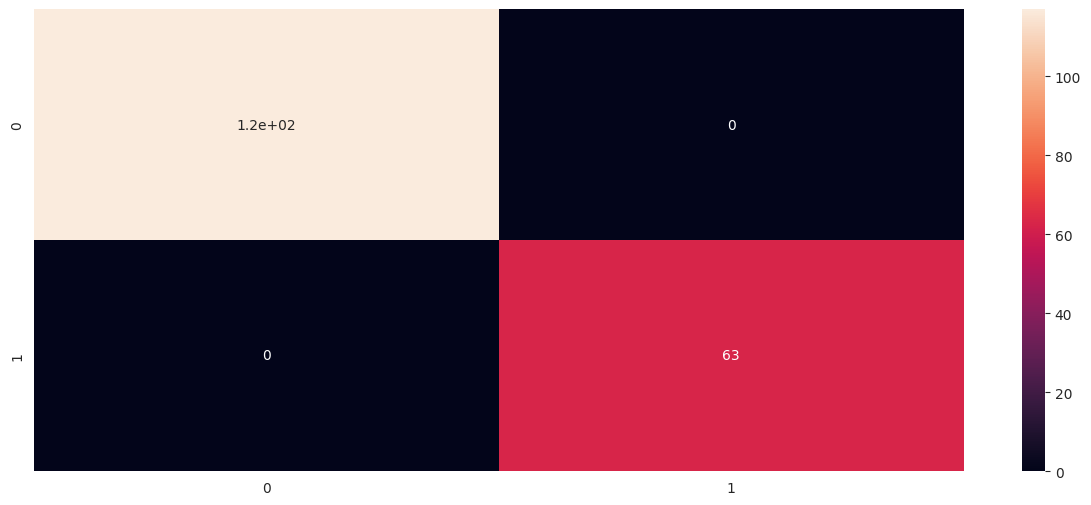

In [224]:
# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
sns.heatmap(cm, annot=True)
print(acc_logreg,'%')

[[115   2]
 [  0  63]]
0.9888888888888889


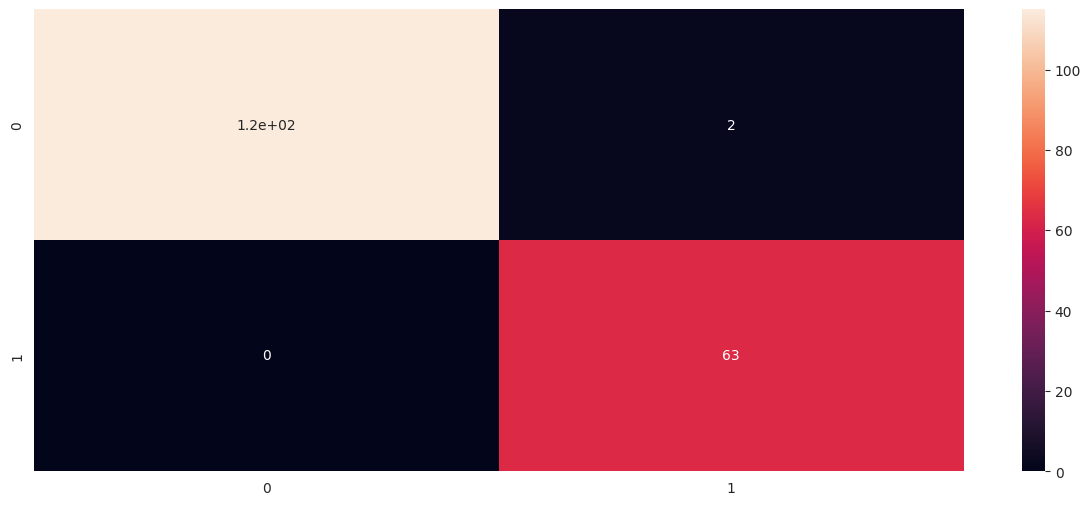

In [225]:
# Finding the optimum number of neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    # Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)


cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
sns.heatmap(cm, annot=True)
print(acc_knn)

[[117   0]
 [  1  62]]
0.9944444444444445


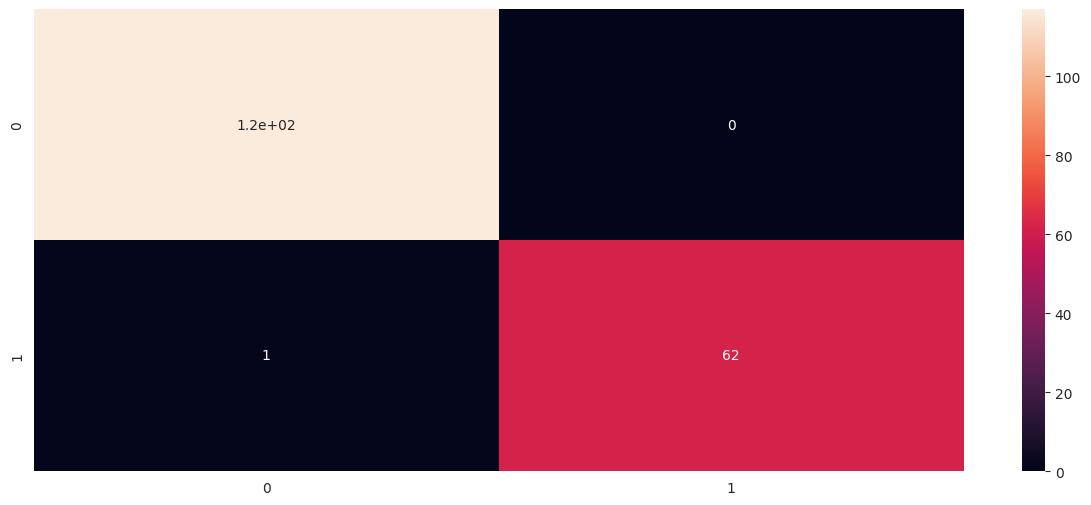

In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    # Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(acc_decisiontree)
mylist.append(acc_decisiontree)

[[117   0]
 [  0  63]]
1.0


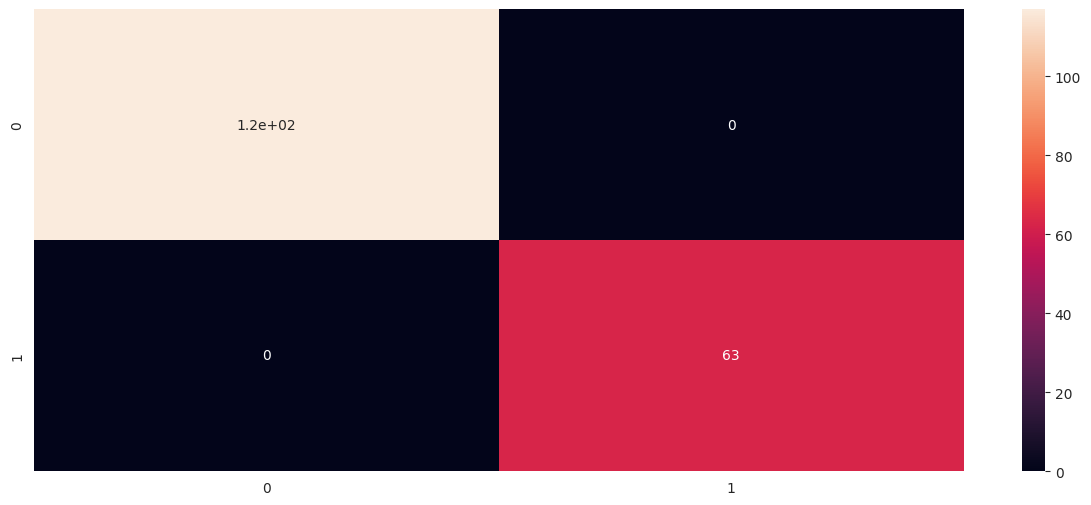

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
sns.heatmap(cm, annot=True)
print(acc_randomforest)

[[117   0]
 [  1  62]]
0.9944444444444445


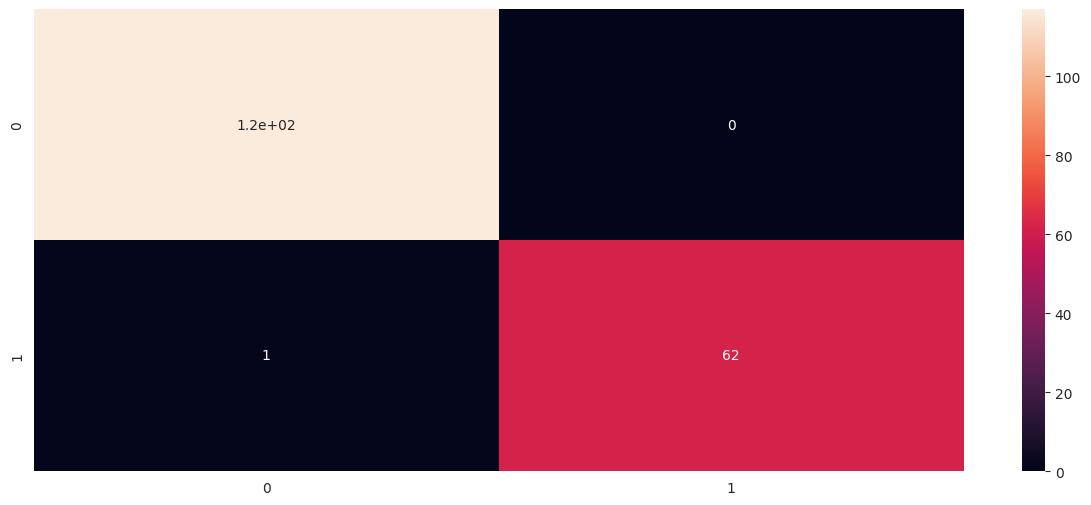

In [228]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
acc_AdaBoostClassifier = accuracy_score(y_test, y_pred)
mylist.append(acc_AdaBoostClassifier)
print(cm)
sns.heatmap(cm, annot=True)
print(acc_AdaBoostClassifier)

[[116   1]
 [  0  63]]
0.9944444444444445 %


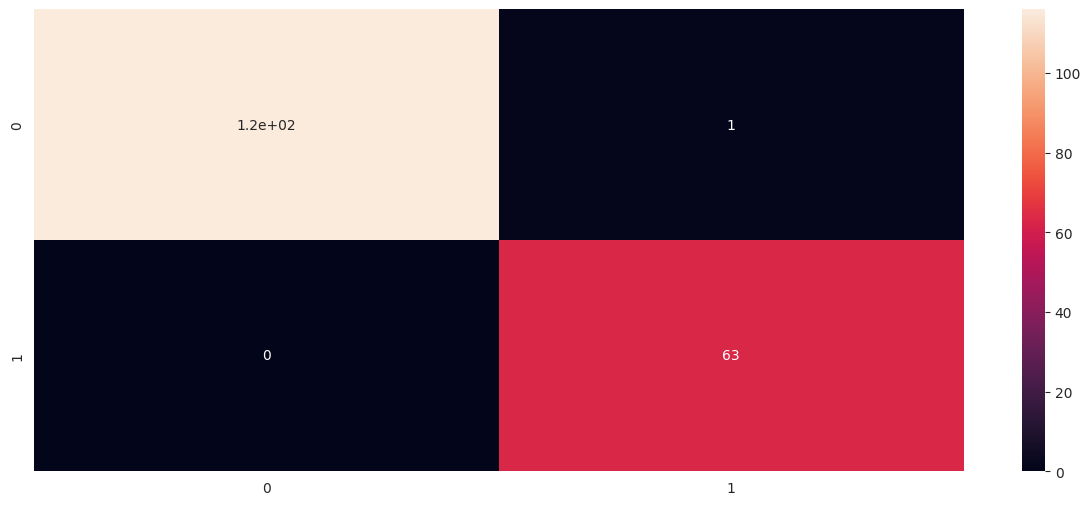

In [229]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
acc_svc = accuracy_score(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(acc_svc,'%')
mylist.append(acc_svc)

In [230]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg,
              acc_randomforest, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,1.000000
3,Random Forest,1.000000
0,Support Vector Machines,0.994444
4,Decision Tree,0.994444
1,KNN,0.988889


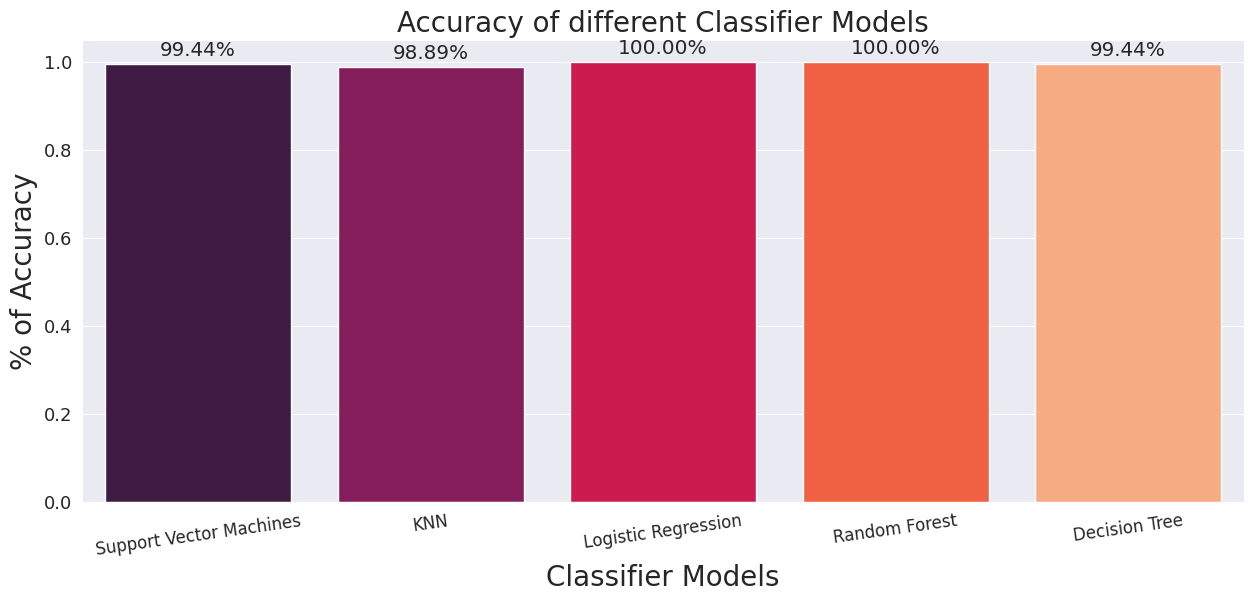

In [231]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [232]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVC": SVC(),
}

for model_name, model in models.items():
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')

    # Generate a classification report
    print(f'{model_name} Classification Report:')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print(f'{model_name} Confusion Matrix:')
    print(cm)

    print('-' * 55)



Random Forest Accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        63

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

Random Forest Confusion Matrix:
[[117   0]
 [  0  63]]
-------------------------------------------------------
Logistic Regression Accuracy: 1.00
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        63

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

Logistic Regression Confusion Matrix:
[[117   0]
 [  0  63]]
------------------------------